In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

##### Quiz 2 - Regression (Supervised Learning)


##### Part 2 - (100pts)

A hospital availed of your expertise to help them with their cardiology department. Upon collecting several
data sets, they would like to have an assistant program that will help them to determine the probability of
a heart attack. The following are the things they can ask/check with the patient upon entry:

1. **Age and sex (gender):** (1 = male; 0 = female)
2. **cp:** chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 =
   asymptomatic)

3. **trestbps:** resting blood pressure (in mm Hg on admission to the hospital)

4. **chol:** serum cholesterol in mg/dl

5. **thalach:** maximum heart rate achieved.

Using this information, determine the probability that a patient is/ will be suffering a heart attack.

If a patient is not admitted (the probability is too low), the program must suggest that the patient be
admitted to the normal ward for further checking.

If a patient is admitted (probability is high), the program must suggest having the patient be tested and
record the following:

1. **fbs:** fasting blood sugar (1 = true; 0 = false)
2. **restecg:** resting electrocardiographic results.

   - 0 = normal
   - 1 = having ST-T wave abnormality
   - 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria

3. **thal:** 3 = normal; 6 = fixed defect; 7 = reversible defect

Three additional pieces of information will be added to determine the probability of a heart attack. If the
probability computed consists of or is near the value initially obtained, the program will recommend
specialist intervention and will print a report containing the information of the patient

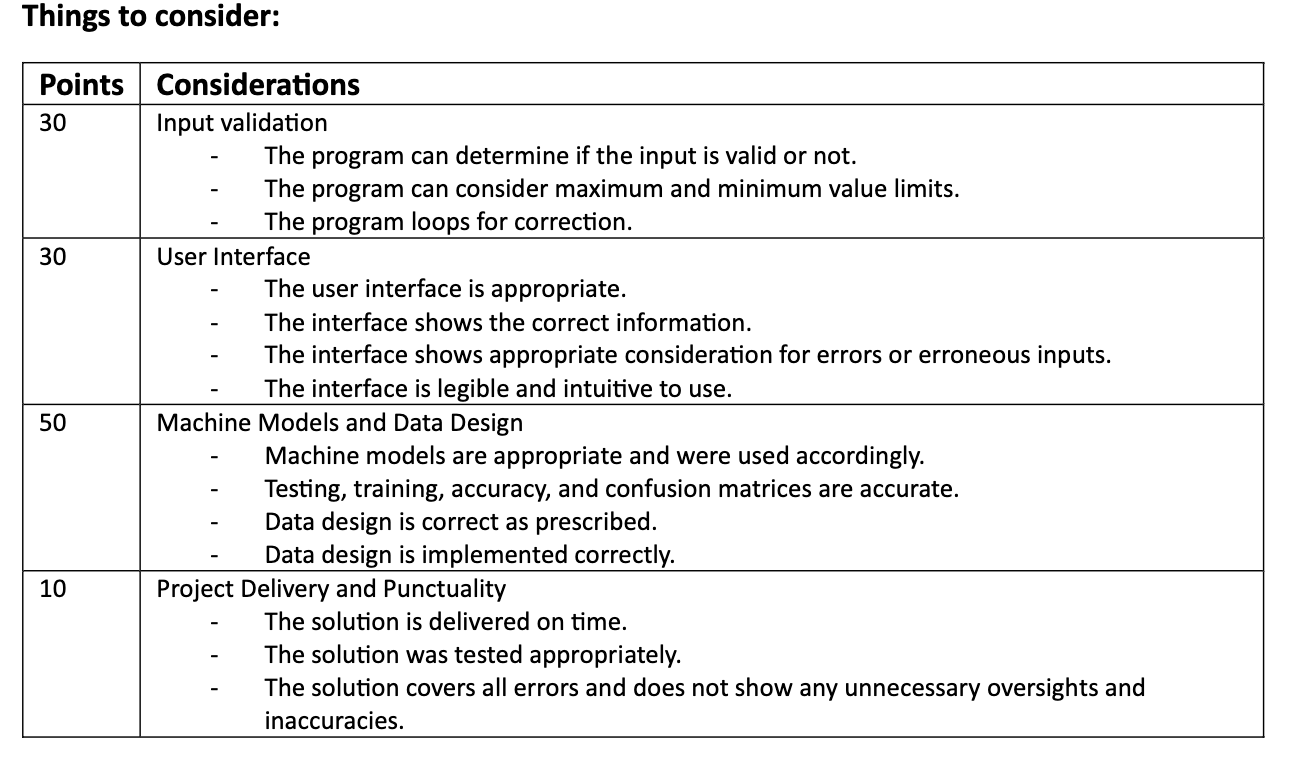


Based on the heatmap above we can see that the smoker feature is highly correlated to the charges feature.


### Load the dataset


In [54]:
df = pd.read_csv("../../datasets/heart_attack-quiz-2.csv")

df.head()

,heart_disease,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0,63,1,1,145,233,1,2,150,0,2.3,3,0,6
1,1,67,1,4,160,286,0,2,108,1,1.5,2,3,3
2,1,67,1,4,120,229,0,2,129,1,2.6,2,2,7
3,0,37,1,3,130,250,0,0,187,0,3.5,3,0,3
4,0,41,0,2,130,204,0,2,172,0,1.4,1,0,3


In [55]:
# Split the male and female dataframes
male_df = df.where(df['gender'] == 1).dropna()
female_df = df.where(df['gender'] == 0).dropna()

#### 1. Train a model that uses age, gender, cp, trestbps, chol, and thalach to predict whether a patient will have a heart attack or not.


In [56]:
def split_data(df: pd.DataFrame):
    features = ["age", "cp", "trestbps", "chol", "thalach"]
    x = df[features]
    y = df["heart_disease"]

    # Splitting the data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=0.3, random_state=0
    )

    return x_train, x_test, y_train, y_test, x, y

def train_model(x_train, y_train):
    # Train the model
    classifier = LogisticRegression(random_state=0, max_iter=1000)
    classifier.fit(x_train, y_train)

    return classifier

In [57]:
(initial_male_x_train, 
 initial_male_x_test, 
 initial_male_y_train, 
 initial_male_y_test, 
 initial_male_x, 
 initial_male_y) = split_data(male_df)

(initial_female_x_train, 
 initial_female_x_test, 
 initial_female_y_train, 
 initial_female_y_test,
 initial_female_x, 
 initial_female_y) = split_data(female_df)

# Train the model
initial_male_classifier = train_model(initial_male_x_train, initial_male_y_train)
initial_female_classifier = train_model(initial_female_x_train, initial_female_y_train)

In [58]:
# Evaluate the models
male_score = initial_male_classifier.score(initial_male_x_test,initial_male_y_test)
female_score = initial_female_classifier.score(initial_female_x_test,initial_female_y_test)
print(f"Score [Male]: {male_score * 100:.2f}%")
print(f"Score [Female]: {female_score * 100:.2f}%")

# Evaluate the model using cross validation
from sklearn.model_selection import cross_val_score

male_scores = cross_val_score(
    initial_male_classifier, initial_male_x, initial_male_y, cv=5
)

female_scores = cross_val_score(
    initial_female_classifier, initial_female_x, initial_female_y, cv=5
)

print(f"Cross validation scores [Male]: {male_scores.mean() * 100:.2f}%")
print(f"Cross validation scores [Female]: {female_scores.mean() * 100:.2f}%")

Score [Male]: 72.13%
Score [Female]: 86.21%
Cross validation scores [Male]: 75.17%
Cross validation scores [Female]: 86.47%


#### 2. Train a model using the previous features but adds fbs, restecg, and thal to predict whether a patient will have a heart attack or not.


In [59]:
def split_data_admitted(df: pd.DataFrame):
    features = ["age", "cp", "trestbps", "chol", "thalach", "fbs", "restecg", "thal"]
    x = df[features]
    y = df["heart_disease"]

    # Splitting the data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=0.3, random_state=0
    )

    return x_train, x_test, y_train, y_test, x, y

def train_model_admitted(x_train, y_train):
    # Train the model
    classifier = LogisticRegression(random_state=0, max_iter=1000)
    classifier.fit(x_train, y_train)

    return classifier

In [60]:
(admitted_male_x_train, 
 admitted_male_x_test, 
 admitted_male_y_train, 
 admitted_male_y_test, 
 admitted_male_x, 
 admitted_male_y) = split_data_admitted(male_df)

(admitted_female_x_train, 
 admitted_female_x_test, 
 admitted_female_y_train, 
 admitted_female_y_test,
 admitted_female_x, 
 admitted_female_y) = split_data_admitted(female_df)

# Train the model
admitted_male_classifier = train_model_admitted(admitted_male_x_train, admitted_male_y_train)
admitted_female_classifier = train_model_admitted(admitted_female_x_train, admitted_female_y_train)

In [68]:
# Evaluate the models
male_score = admitted_male_classifier.score(admitted_male_x_test,admitted_male_y_test)
female_score = admitted_female_classifier.score(admitted_female_x_test,admitted_female_y_test)
print(f"Score [Male]: {male_score * 100:.2f}%")
print(f"Score [Female]: {female_score * 100:.2f}%")

# Evaluate the model using cross validation
from sklearn.model_selection import cross_val_score

male_scores = cross_val_score(
    admitted_male_classifier, admitted_male_x, admitted_male_y, cv=5
)

female_scores = cross_val_score(
    admitted_female_classifier, admitted_female_x, admitted_female_y, cv=5
)

print(f"Cross validation scores [Male]: {male_scores.mean() * 100:.2f}%")
print(f"Cross validation scores [Female]: {female_scores.mean() * 100:.2f}%")

Score [Male]: 72.13%
Score [Female]: 89.66%
Cross validation scores [Male]: 75.13%
Cross validation scores [Female]: 86.42%


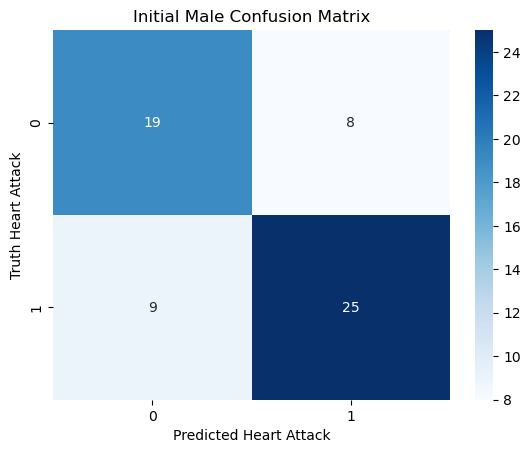

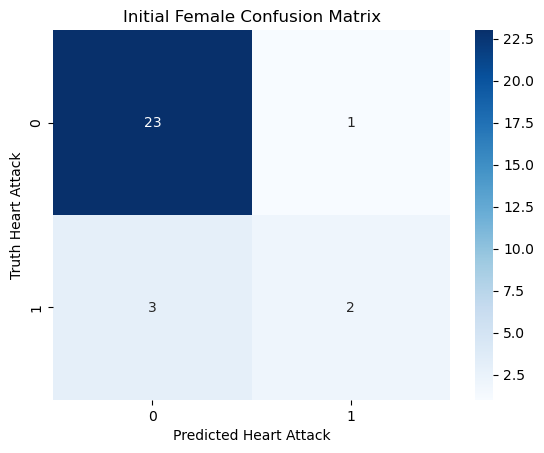

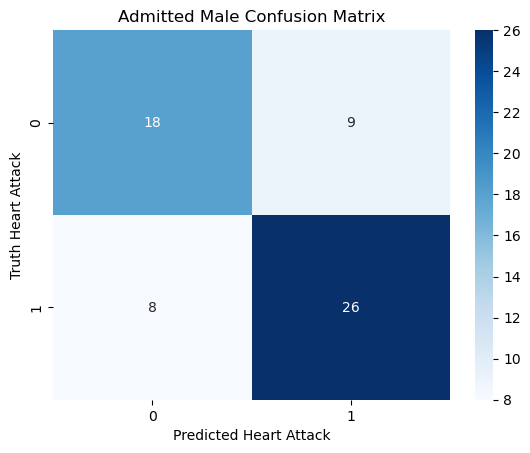

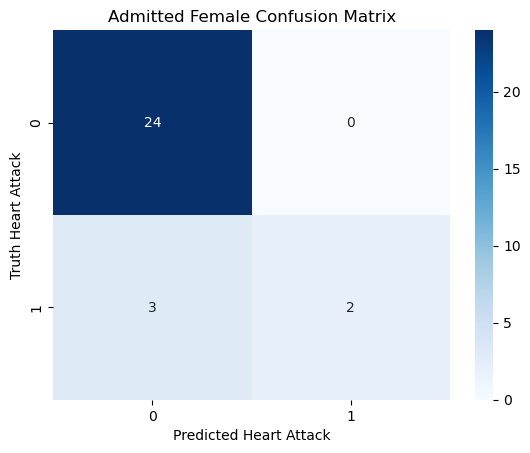

In [71]:
# Evaluate the model using confusion matrix
from sklearn.metrics import confusion_matrix


initial_male_pred = initial_male_classifier.predict(initial_male_x_test)
initial_female_pred = initial_female_classifier.predict(initial_female_x_test)

initial_cm_male = confusion_matrix(initial_male_y_test, initial_male_pred)
initial_cm_female = confusion_matrix(initial_female_y_test, initial_female_pred)

# Plot the confusion matrix
sns.heatmap(initial_cm_male, annot=True, cmap='Blues')
plt.title("Initial Male Confusion Matrix")
plt.xlabel("Predicted Heart Attack")
plt.ylabel("Truth Heart Attack")
plt.show()

sns.heatmap(initial_cm_female, annot=True, cmap='Blues')
plt.title("Initial Female Confusion Matrix")
plt.xlabel("Predicted Heart Attack")
plt.ylabel("Truth Heart Attack")
plt.show()

admitted_male_pred = admitted_male_classifier.predict(admitted_male_x_test)
admitted_female_pred = admitted_female_classifier.predict(admitted_female_x_test)

admitted_cm_male = confusion_matrix(admitted_male_y_test, admitted_male_pred)
admitted_cm_female = confusion_matrix(admitted_female_y_test, admitted_female_pred)


sns.heatmap(admitted_cm_male, annot=True, cmap='Blues')
plt.title("Admitted Male Confusion Matrix")
plt.xlabel("Predicted Heart Attack")
plt.ylabel("Truth Heart Attack")
plt.show()

sns.heatmap(admitted_cm_female, annot=True, cmap='Blues')
plt.title("Admitted Female Confusion Matrix")
plt.xlabel("Predicted Heart Attack")
plt.ylabel("Truth Heart Attack")
plt.show()

In [63]:
# Get the min and max values of the features
def get_min_max(column: str):
    return df[column].min(), df[column].max()


# Get the min and max values of the features
min_age, max_age = get_min_max("age")
min_cp, max_cp = get_min_max("cp")
min_trestbps, max_trestbps = get_min_max("trestbps")
min_chol, max_chol = get_min_max("chol")
min_thalach, max_thalach = get_min_max("thalach")

min_rest_ecg, max_rest_ecg = get_min_max("restecg")
min_thal, max_thal = get_min_max("thal")
min_fbs, max_fbs = get_min_max("fbs")

In [72]:
# Save the models
import pickle

def save_model(file_name: str, model):
    with open(f"../../models/{file_name}", 'wb') as f:
        pickle.dump(model, f)


save_model('heart_attack_initial_male_model.pb', initial_male_classifier)
save_model('heart_attack_initial_female_model.pb',initial_female_classifier)
save_model('heart_attack_admitted_male_model.pb', admitted_male_classifier)
save_model('heart_attack_admitted_female_model.pb',admitted_female_classifier)

### GUI (Graphical User Interface)


In [65]:
import ipywidgets as widgets
from IPython.display import display, clear_output
from typing import cast
from enum import Enum

In [66]:
# Create a variable that will hold the input values as well as the output values
class Status(Enum):
    ADMITTED = 1
    NOT_ADMITTED = 2
    UNKNOWN = 3


class HeartAttackStatus(Enum):
    HIGH = 1
    LOW = 2
    UNKNOWN = 3

In [67]:
admission_probs = []
admitted_probs = []

cp_mapping = {
    'Typical Angina': 1,
    'Atypical Angina': 2,
    'Non-Anginal Pain': 3,
    'Asymptomatic': 4,
}

fbs_mapping = {
    'True': 1,
    'False': 0,

}

restecg_mapping = {
    'Normal': 0,
    'Having ST-T': 1,
    'Hypertrophy': 2,
}

admission_input_dict = {
    "sex": "",
    "age": 18,
    # chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 =
    # asymptomatic)
    "cp": list(cp_mapping.keys())[0],
    # resting blood pressure (in mm Hg on admission to the hospital)
    "trestbps": 0,
    # serum cholestoral in mg/dl
    "chol": 0,
    # maximum heart rate achieved.
    "thalach": 0,
}

admitted_input_dict = {
    # Fasting blood sugar (1 = true; 0 = false)
    "fbs": list(fbs_mapping.keys())[0],
    # resting electrocardiographic results (0 = normal; 1 = having ST-T; 2 = hypertrophy)
    "restecg": list(restecg_mapping.keys())[0],
    # thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
    "thal": 0.0,
}

has_selected_sex = admission_input_dict["sex"] != ""

def input_field(*, 
                description: str= "", 
                desc_text:str ='',
                value: float =0,
                disabled: bool = False,
                min: float = 0, 
                max: float = 1, **kwargs):
    input = widgets.BoundedFloatText(
        value=value,
        min=min,
        max=max,
        description=description,
        disabled=disabled,
        kwargs=kwargs,
    )

    container = widgets.HBox(
        [input, widgets.Label(desc_text)],
        layout=widgets.Layout(),
    )
    return input, container

def dropdown_field(*, 
                description: str= "", 
                desc_text:str ='',
                value: float = 0,
                disabled: bool = False,
                options: list[str] = [], **kwargs):
    
    input = widgets.Dropdown(
        value=value,
        options=options,
        description=description,
        disabled=disabled,
        kwargs=kwargs,
    )

    container = widgets.HBox(
        [input, widgets.Label(desc_text)],
        layout=widgets.Layout(),
    )
    return input, container


# Create the widgets
sex_dropdown, sex_container = dropdown_field(
    value=admission_input_dict["sex"],
    options=["", "Male", "Female"],
    description="Sex: ",
)

age_input, age_container= input_field(
    value=admission_input_dict["age"],
    min=min_age,
    max=max_age,
    description="Age:",
    disabled=not has_selected_sex,
    continuous_update=False,
    orientation="horizontal",
)

cp_dropdown, cp_container = dropdown_field(
    value=admission_input_dict["cp"],
    description="CP:",
    options=["Typical Angina", "Atypical Angina", "Non-Anginal Pain", "Asymptomatic"],
    disabled=not has_selected_sex,
    description_tooltip="Chest Pain Type: 1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic",
    desc_text="Chest Pain Type",
)

trestbps_input, trestbps_container = input_field(
    value=admission_input_dict["trestbps"],
    description="TrestBps:",
    disabled=not has_selected_sex,
    min=min_trestbps,
    max=max_trestbps,
    continuous_update=False,
    description_tooltip="Resting Blood Pressure (in mm Hg)",
    desc_text="Resting Blood Pressure (in mm Hg)",
)

chol_input, chol_container= input_field(
    value=admission_input_dict["chol"],
    description="Chol:",
    disabled=not has_selected_sex,
    min=min_chol,
    max=max_chol,
    continuous_update=False,
    description_tooltip="Serum Cholestoral in mg/dl",
    desc_text="Serum Cholestoral in mg/dl",
)

thalach_input, thalach_container = input_field(
    value=admission_input_dict["thalach"],
    description="Thalach:",
    disabled=not has_selected_sex,
    min=min_thalach,
    max=max_thalach,
    continuous_update=False,
    description_tooltip="Maximum Heart Rate Achieved",
    desc_text="Maximum Heart Rate Achieved",
)


# Create the output widgets
container = widgets.VBox(
    [sex_dropdown, age_container, cp_container, trestbps_container, chol_container, thalach_container],
    layout=widgets.Layout(width="100%"),
)

# fbs, restecg, and thal
fbs_dropdown, fbs_container = dropdown_field(
    value=admitted_input_dict["fbs"],
    options=["True", "False"],
    description="Fbs:",
    disabled=not has_selected_sex,
    description_tooltip="Fasting Blood Sugar (1 = true; 0 = false)",
    desc_text="Fasting Blood Sugar",
)

restecg_dropdown, restecg_container = dropdown_field(
    value=admitted_input_dict["restecg"],
    description="Restecg:",
    disabled=not has_selected_sex,
    options=["Normal", "ST-T", "Hypertrophy"],
    description_tooltip="Resting Electrocardiographic Results (0 = normal; 1 = having ST-T; 2 = hypertrophy)",
    desc_text="Resting Electrocardiographic Results",
)

thal_input, thal_container = input_field(
    value=admitted_input_dict["thal"],
    description="Thal:",
    disabled=not has_selected_sex,
    continuous_update=False,
    min=min_thal,
    max=max_thal,
    description_tooltip="Thal: 3 = normal; 6 = fixed defect; 7 = reversable defect",
    desc_text="Thal",
)

admitted_container = widgets.VBox([fbs_container, restecg_container, thal_container])


def toggle_admitted_inputs(disabled: bool):
    fbs_dropdown.disabled = disabled
    restecg_dropdown.disabled = disabled
    thal_input.disabled = disabled


def toggle_inputs(disabled: bool):
    age_input.disabled = disabled
    cp_dropdown.disabled = disabled
    trestbps_input.disabled = disabled
    chol_input.disabled = disabled
    thalach_input.disabled = disabled


# header
header = widgets.HTML(
    value="""
    <div>
        <h1>Heart Attack Prediction </h1>
        <p>Fill-up the following information to predict if a patient is at risk of a heart attack.</p>
        <p><em>Note: for more information regarding the fields hover on their labels.</em> </p>
    </div>
    """
)

"""
    If a patient is not admitted (the probability is too low), the program must suggest that the patient be
    admitted to the normal ward for further checking.

    If a patient is admitted (probability is high), the program must suggest having the patient be tested and
    record the following:
"""
# Not Admitted Message
not_admitted_message = widgets.HTML(
    value="<h4>Patient should be admitted to a normal ward for further checking.</h4>"
)

# Admitted Message
admitted_message = widgets.HTML(
    value=f"""
    <div>
        <p>Patient has a unknown% chance of having a heart attack.</p>
        <p>Patient should be tested, please fill-up the following:</p>
    </div>
    """
)

# Heart Attack Message
heart_attack_message = widgets.HTML(
    value="<h4>Patient has a high chance of heart attack</h4>"
)


def update_ui(
    status: Status = Status.UNKNOWN,
    heart_attack_status: HeartAttackStatus = HeartAttackStatus.UNKNOWN,
):
    clear_output(wait=True)
    display(header, container)
    if status == Status.UNKNOWN:
        return

    if status == Status.NOT_ADMITTED:
        display(not_admitted_message)
        return

    display(admitted_message, admitted_container)

    if heart_attack_status != HeartAttackStatus.UNKNOWN:
        display(heart_attack_message)
        return


def update_values(status: Status = Status.UNKNOWN):
    admission_input_dict["cp"] = float(cp_mapping[str(cp_dropdown.value)])
    admission_input_dict["age"] = float(str(age_input.value))
    admission_input_dict["trestbps"] = float(str(trestbps_input.value))
    admission_input_dict["chol"] = float(str(chol_input.value))
    admission_input_dict["thalach"] = float(str(thalach_input.value))

    # Only updated the admitted values if the user is admitted
    if status == Status.ADMITTED:
        admitted_input_dict["fbs"] = float(fbs_mapping[str(fbs_dropdown.value)])
        admitted_input_dict["restecg"] = float(restecg_mapping[str(restecg_dropdown.value)])
        admitted_input_dict["thal"] = float(str(thal_input.value))


def on_admitted_input_change(event):
    global admitted_probs
    update_values(Status.ADMITTED)

    # Predict if the user will have a heart attack
    # fbs, restecg, thal
    age = admission_input_dict["age"]
    gender = 1 if admission_input_dict["sex"] == "Male" else 0
    cp = admission_input_dict["cp"]
    trestbps = admission_input_dict["trestbps"]
    chol = admission_input_dict["chol"]
    thalach = admission_input_dict["thalach"]
    fbs = admitted_input_dict["fbs"]
    restecg = admitted_input_dict["restecg"]
    thal = admitted_input_dict["thal"]

    admitted_probs = admitted_h_attack_classifier.predict_proba(
        [
            [
                age,
                gender,
                cp,
                trestbps,
                chol,
                thalach,
                fbs,
                restecg,
                thal,
            ]
        ]
    )

    heart_attack_prob = admitted_probs[0][1]
    prev_heart_attack_prob = admission_probs[0][1]
    is_near_prev = abs(heart_attack_prob - prev_heart_attack_prob) <= 0.1
    will_have_heart_attack = heart_attack_prob > prev_heart_attack_prob

    heart_attack_status = (
        HeartAttackStatus.HIGH if will_have_heart_attack else HeartAttackStatus.LOW
    )

    # Check if the probability of the patient having a heart attack is near or contains the previous probability
    # of the patient being admitted
    if (
        is_near_prev
        or will_have_heart_attack
    ):
        heart_attack_message.value = f"""
        <div>
            <h4 style="color:red">Patient has a has a {heart_attack_prob * 100:.2f}% chance of heart attack</h4>
            <p style="color:red">Patient should be admitted to the ICU immediately.</p>
            <p>Report the following information to a specialist: </p>
            <ul>
                <li><b>Age:</b> {age}</li>
                <li><b>Gender:</b> {admission_input_dict["sex"]}</li>
                <li><b>Chest Pain Type:</b> {cp}</li>
                <li><b>Resting Blood Pressure:</b> {trestbps}</li>
                <li><b>Serum Cholestoral:</b> {chol}</li>
                <li><b>Maximum Heart Rate Achieved:</b> {thalach}</li>
                <li><b>Fasting Blood Sugar:</b> {fbs}</li>
                <li><b>Resting Electrocardiographic Results:</b> {restecg}</li>
                <li><b>Thalassemia:</b> {thal}</li>
            </ul>
        </div>
        """
    else:
        heart_attack_message.value = f"""
        <div>
            <h4>Patient has a {heart_attack_prob * 100:.2f}% chance of heart attack</h4>
            <p>
                Patient should be under close observation.
            </p>
        </div>
            """

    update_ui(Status.ADMITTED, heart_attack_status)


def on_input_change(event):
    global admission_probs

    update_values()

    # Only get the cp, age, trestbps, chol, and thalach values
    gender = 1 if admission_input_dict["sex"] == "Male" else 0
    cp = admission_input_dict["cp"]
    age = admission_input_dict["age"]
    trestbps = admission_input_dict["trestbps"]
    chol = admission_input_dict["chol"]
    thalach = admission_input_dict["thalach"]

    # Predict if the user should be admitted
    # age, gender, cp, trestbps, chol, thalach
    admission_probs = initial_h_attack_classifier.predict_proba(
        [[age, gender, cp, trestbps, chol, thalach]]
    )
    is_admitted = admission_probs[0][1] > 0.6

    status = Status.ADMITTED if is_admitted else Status.NOT_ADMITTED
    heart_attack_status = HeartAttackStatus.UNKNOWN

    # Update the admitted values if the user is admitted
    if status == Status.ADMITTED:
        # Update the admitted_message
        admitted_message.value = f"""
        <div>
            <h4>Patient has a {admission_probs[0][1] * 100:.2f}% chance of having a heart attack</h4>
            <p>The patient should be admitted and additional information are needed for monitoring:</p>
        </div>
        """
    else:
        not_admitted_message.value = f"""
        <div>
            <h4>Patient has a {admission_probs[0][0] * 100:.2f}% chance of not having a heart attack</h4>
            <p>Please keep in mind that the patient should be monitored</p>
        </div>
        """
        toggle_admitted_inputs(False)


    update_ui(status, heart_attack_status)


def on_sex_change(event):
    admission_input_dict["sex"] = event.new
    toggle_inputs(event.new == "")
    update_ui()


sex_dropdown.observe(on_sex_change, "value")
age_input.observe(on_input_change, "value")
cp_dropdown.observe(on_input_change, "value")
trestbps_input.observe(on_input_change, "value")
chol_input.observe(on_input_change, "value")
thalach_input.observe(on_input_change, "value")

fbs_dropdown.observe(on_admitted_input_change, "value")
restecg_dropdown.observe(on_admitted_input_change, "value")
thal_input.observe(on_admitted_input_change, "value")

update_ui()

HTML(value='\n    <div>\n        <h1>Heart Attack Prediction </h1>\n        <p>Fill-up the following informati…